In [3]:
#**********************************************COVID19*************************************************************************
#********************************************************************************************************************************
#*******************************************************************************************************************************
#ANALISIS DEL FICHEROS
#https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv
#Cargamos el fichero de doctores la ruta de kaggle:
#https://www.kaggle.com/antgoldbloom/doctors-and-nurses-per-1000-people-by-country
#Cargamos el fichero de contagios a nivel mundial. 
#https://www.kaggle.com/dylansp/covid19-country-level-data-for-epidemic-model#Country_Level_Info.csv
#La ruta del fichero de covid19 es: 

#import libraries
import numpy as np
import pandas as pd
#Importo las librerias para la representacion grafica. 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser

#Importamos las librerias para los arboles de decision
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
#Importamos las librerias para realizar RandomForest. 
from sklearn.ensemble import RandomForestRegressor

#Importamos las librerias para Clustering
# K-Means clustering algorithm
from sklearn.cluster import KMeans

#Librerias para PCA(Analisis de Componentes Principales)
# PCA dimension reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#Para plotear bonitas figuras en jupyter. 
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)





In [93]:
#Cargamos el fichero de doctores la ruta de kaggle:
#https://www.kaggle.com/antgoldbloom/doctors-and-nurses-per-1000-people-by-country
#Cargamos el fichero de contagios a nivel mundial. 
#https://www.kaggle.com/dylansp/covid19-country-level-data-for-epidemic-model#Country_Level_Info.csv
#La ruta del fichero de covid19 es: 

#Abrimos los datos del fichero de entrenamiento
med = pd.read_csv('AlmacenDatos/Doctors_Per_Capital_By_Country.csv')
enf = pd.read_csv('AlmacenDatos/Country_Level_Info.csv')
#Vemos el fichero la estructura del mismo. Como vemos tenemos un registro por pais del numero de casos 
#Comproabmos un pequeño resumen de la estructura del fichero. 
#dt.head(20)
#Mostramos la cabecera de los casos de contagiados y muertos desde el inicio de la epidemia. 
enf.head(20)

,Date,Country_Region,alpha-3_code,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
0,2020-01-22,Afghanistan,AFG,37172386,0,0,0,0,0,0,0
1,2020-01-22,Albania,ALB,2866376,0,0,0,0,0,0,0
2,2020-01-22,Algeria,DZA,42228429,0,0,0,0,0,0,0
3,2020-01-22,Andorra,AND,77006,0,0,0,0,0,0,0
4,2020-01-22,Angola,AGO,30809762,0,0,0,0,0,0,0
5,2020-01-22,Antigua and Barbuda,ATG,96286,0,0,0,0,0,0,0
6,2020-01-22,Argentina,ARG,44494502,0,0,0,0,0,0,0
7,2020-01-22,Armenia,ARM,2951776,0,0,0,0,0,0,0
8,2020-01-22,Australia,AUS,24992369,0,0,0,0,0,0,0
9,2020-01-22,Austria,AUT,8847037,0,0,0,0,0,0,0


In [94]:
#Mostramos el numero de medicos por ciudad capital en el mundo. 
med.head(20)
#De este panel debemos filtrar por location y por time. Luego hay datos que no nos da mucha informacio
#Como FlagCodes. Nuestros datos son la llocation, time, y value.

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,MEDICALDOC,TOT,1000HAB,A,1961,1.13,NaN
1,AUS,MEDICALDOC,TOT,1000HAB,A,1964,1.23,NaN
2,AUS,MEDICALDOC,TOT,1000HAB,A,1965,1.22,NaN
3,AUS,MEDICALDOC,TOT,1000HAB,A,1966,1.23,NaN
4,AUS,MEDICALDOC,TOT,1000HAB,A,1967,1.26,NaN
5,AUS,MEDICALDOC,TOT,1000HAB,A,1968,1.24,NaN
6,AUS,MEDICALDOC,TOT,1000HAB,A,1969,1.26,NaN
7,AUS,MEDICALDOC,TOT,1000HAB,A,1970,1.33,NaN
8,AUS,MEDICALDOC,TOT,1000HAB,A,1971,1.26,NaN
9,AUS,MEDICALDOC,TOT,1000HAB,A,1972,1.38,NaN


In [95]:
#Vamos a quedarnos unicamente con los datos de España
#De los datos nos vamos a quedar de los medicos.Filtramos por location = ESP(en codigo alpha)
esmed=med[med['LOCATION'] == 'ESP']
esmed.describe()
#Como podemos ver reducimos a 313 filas para trabajar con ellas, aun asi , debemos acumular por pais. 
#Como podemos ver tenemos 25 registros. 


,TIME,Value
count,25.000000,25.000000
mean,2003.920000,3.282000
std,9.477693,0.599375
min,1980.000000,1.840000
25%,1999.000000,3.050000
50%,2005.000000,3.540000
75%,2011.000000,3.800000
max,2017.000000,3.880000


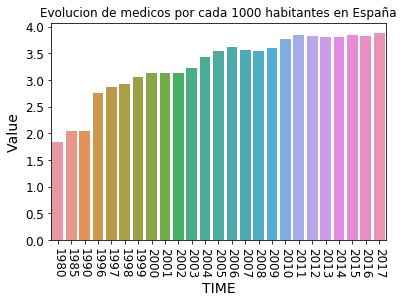

In [96]:
esmed.tail(30)
#Aqui podemos ver que tneemos los datos del porcentaje de medicos por cada 1000 habitantes es de 3,88. Podemos comprobar mediante
#la variable time, su relacion de medicos en el tiempo.
#Vamos a representar los datos para ver el porcentaje en el tiempo. 
#Vamos a representar un grafico de barras, donde en las coordenadas x, tendremos la fecha, y en la y el numero de casos.
p = sns.barplot(x='TIME', y = 'Value', data=esmed, estimator=np.mean);
p.set(title='Evolucion de medicos por cada 1000 habitantes en España')
p.set_xticklabels(p.get_xticklabels(), rotation=-90);



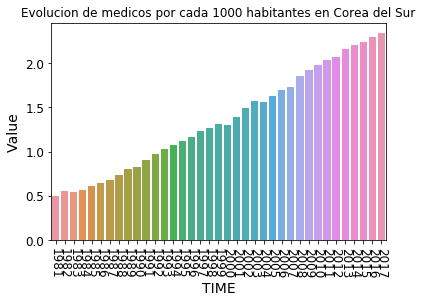

In [97]:
#Ahora vamos a compara respecto Corea del sur
#Vamos a quedarnos unicamente con los datos de España
#De los datos nos vamos a quedar de los medicos.Filtramos por location = ESP(en codigo alpha)
KORmed=med[med['LOCATION'] == 'KOR']

#Aqui podemos ver que tneemos los datos del porcentaje de medicos por cada 1000 habitantes es de 3,88. Podemos comprobar mediante
#la variable time, su relacion de medicos en el tiempo.
#Vamos a representar los datos para ver el porcentaje en el tiempo. 
#Vamos a representar un grafico de barras, donde en las coordenadas x, tendremos la fecha, y en la y el numero de casos.
p = sns.barplot(x='TIME', y = 'Value', data=KORmed, estimator=np.mean);
p.set(title='Evolucion de medicos por cada 1000 habitantes en Corea del Sur')
p.set_xticklabels(p.get_xticklabels(), rotation=-90);


In [98]:
#Vamos ahora una vez visto, tratar con los datos de los enfermos y muertos.
enf.head(1)


,Date,Country_Region,alpha-3_code,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
0,2020-01-22,Afghanistan,AFG,37172386,0,0,0,0,0,0,0


In [99]:
#Una vez realizdo, vamos a filtar por TIME igual a 2017 que es la ultima fecha.
enf=enf[enf['alpha-3_code'] == 'ESP']
print(f"There are {enf.shape[1]:,} columns in the dataframe.")
print(f"There are {enf.shape[0]:,} rows in the dataframe.")
enf.head(2)

There are 11 columns in the dataframe.
There are 80 rows in the dataframe.


,Date,Country_Region,alpha-3_code,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
156,2020-01-22,Spain,ESP,46723749,0,0,0,0,0,0,0
341,2020-01-23,Spain,ESP,46723749,0,0,0,0,0,0,0


In [100]:
enf.describe()

,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
count,80.0,80.000000,80.000000,80.00000,80.000000,80.000000,80.00000,80.000000
mean,46723749.0,25927.812500,2297.575000,0.26250,1978.412500,201.012500,0.02500,23629.975000
std,0.0,46502.993981,4479.247984,0.67023,2954.766673,322.950852,0.15711,42045.521313
min,46723749.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
25%,46723749.0,2.000000,0.000000,0.00000,0.000000,0.000000,0.00000,2.000000
50%,46723749.0,102.000000,0.000000,0.00000,26.500000,0.000000,0.00000,102.000000
75%,46723749.0,26222.500000,1474.250000,0.00000,4227.000000,348.250000,0.00000,24748.250000
max,46723749.0,158273.000000,16081.000000,2.00000,9630.000000,961.000000,1.00000,142190.000000


In [101]:
# Seleccionamos las columnas mas importantes
column_1 = 'New_Confirmed_Cases'
column_2 = 'New_Fatalities'
enf = enf[[column_1, column_2]]

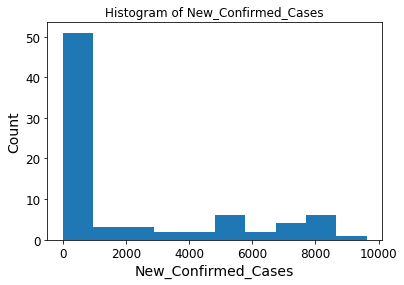

In [102]:
#Realizamos un histograma.
ax = enf.New_Confirmed_Cases.hist(grid=False);

ax.set(xlabel='New_Confirmed_Cases', 
       ylabel='Count', 
       title='Histogram of New_Confirmed_Cases');
#Para nosotros contar las veces que se repite estos datos, no es importante, para nosotros lo interesante
#seria las veces que se repite Value, que es el numero de medicos que hay por casi 1000 habitantes.

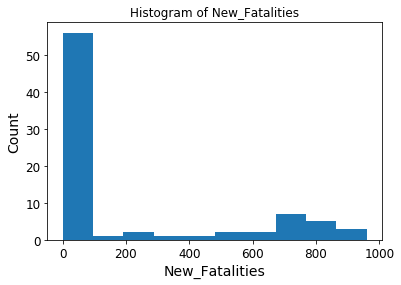

In [103]:
ax = enf.New_Fatalities.hist(grid=False);

ax.set(xlabel='New_Fatalities', 
       ylabel='Count', 
       title='Histogram of New_Fatalities');

In [104]:
#En este caso podemos eliminar de nuestra clasificacion los patrones que veamos que no nos aportan mucho
#New_Confirmed_Cases = enf.New_Confirmed_Cases > 100
#New_Fatalities = enf.New_Fatalities >50
#enf= enf[New_Confirmed_Cases & New_Fatalities]

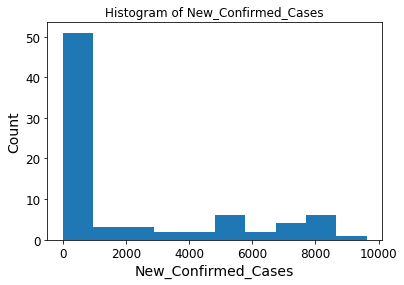

In [105]:
ax = enf.New_Confirmed_Cases.hist(grid=False);
ax.set(xlabel='New_Confirmed_Cases', 
       ylabel='Count', 
       title='Histogram of New_Confirmed_Cases');

#No hemos filtrado

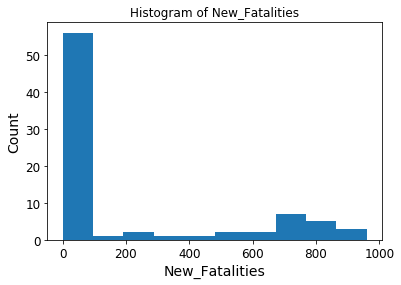

In [106]:
ax = enf.New_Fatalities.hist(grid=False);

ax.set(xlabel='New_Fatalities', 
       ylabel='Count', 
       title='Histogram of New_Fatalities');

In [107]:
print(f"There are {enf.shape[1]:,} columns in the dataframe.")
print(f"There are {enf.shape[0]:,} rows in the dataframe.")

There are 2 columns in the dataframe.
There are 80 rows in the dataframe.


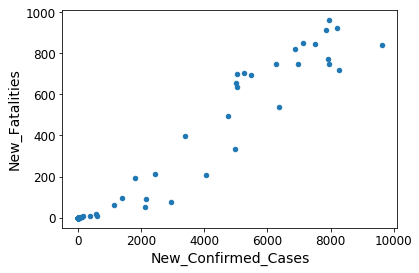

In [108]:
# Plot the relationship between these two variables
enf.plot.scatter(x=column_1,
                y=column_2);

In [109]:
#Usamos ELBOW para comprobar cuantos clusteres usar: 
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(enf).score(enf) 
              for i, model in enumerate(k_mean_models)]

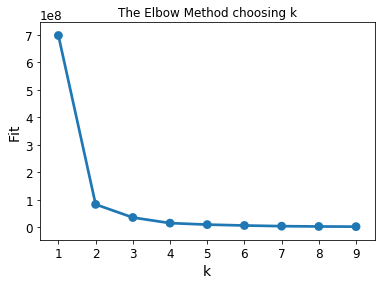

In [110]:
# Let's plot the effect k on the clustering
ax = sns.pointplot(x=list(k_values),
                   y=scores);
ax.set(xlabel='k', 
       ylabel='Fit', 
       title='The Elbow Method choosing k');

In [111]:
#A partir del tratamiento de ELBOW, para estos datos que tenemos, podemos usar 2 clusteres y a partir de el rendimiento 
#Como vemos no va a mejorar demasiado. Asi que usaremos dos k=2

In [114]:
#Inicializamos nuestro Clustering.Reocerdemos que un metodo no supervisado.
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=2) # Number of clusters should be 2 or 3
kmeans.fit(enf);

In [115]:
# Add the cluster labels for each data point to the dataframe
enf['kmeans_labels'] = kmeans.labels_

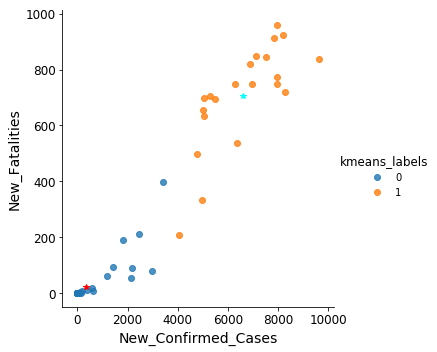

In [116]:
# Plot k-means
kmeans_plot = sns.lmplot(x=column_1, 
                         y=column_2, 
                         data=enf, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# # Plot the mean of cluster #3 (if present)
# kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

In [117]:
#VISUALIZAMOS CON PCA

# Separate out the features from the dataframe
x = enf[[column_1, column_2]].values

# Standardize the features
x = StandardScaler().fit_transform(x)

# Get the first principal component
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['New_Confirmated_Cases'])
data_pca_final = enf.join(principalDf)
data_pca_final['New_Confirmated_Cases'] = pd.Series(data = x[:,0], name = 'New_Confirmated_Cases')
data_pca_final['New_Fatalities'] = pd.Series(data = x[:,1], name = 'New_Fatalities')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


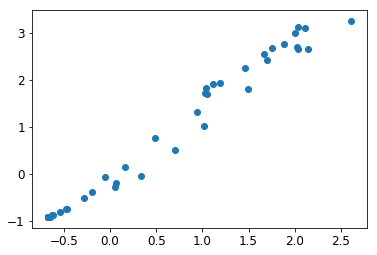

In [118]:
#Understand the relationship between the principal component and funded_amount
plt.scatter(x=x[:,0], y=principalComponents[:,0])

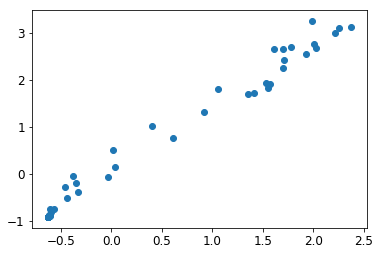

In [119]:
# Understand the relationship between the principal component.
plt.scatter(x=x[:,1], y=principalComponents[:,0])


In [120]:
# Re-run k-means on the standardized features
data_pca_final = data_pca_final.loc[data_pca_final[['New_Confirmated_Cases', 'New_Fatalities']].notnull().all(axis = 1)]
kmeans = KMeans(n_clusters=2) # Number of clusters should be 2 or 3
kmeans.fit(data_pca_final[['New_Confirmated_Cases', 'New_Fatalities']])
data_pca_final['kmeans_labels'] = kmeans.labels_


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

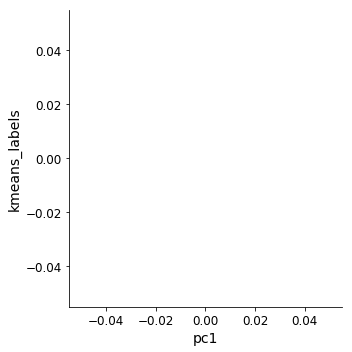

In [89]:
# Plot the principal component against the clusters
kmeans_plot = sns.lmplot(x='pc1', 
                       y='kmeans_labels', 
                       data=data_pca_final, 
                       fit_reg=False,        # Do not fit a regression line to the data
                       legend=True)